# Visualising event catalogue data

The GWTC-1-confident and GWTC-1-marginal event catalogues are publicly available through GWOSC. You can use GWpy to visualise them to study the distribution of events.

## Software configuration

We can use `pip` to install the `gwpy` software package.

<div class="alert alert-info">If you are a <code>conda</code> user, I recommend using that instead of <code>pip</code> (<code>conda install -c conda-forge gwpy</code>).</div>

In [1]:
import sys
!{sys.executable} -m pip install --quiet gwpy

/Users/duncan/opt/miniconda3/envs/gwodq-test/lib/python3.7/site-packages/pip/_vendor/msgpack/fallback.py:133: DeprecationWarning: encoding is deprecated, Use raw=False instead.
  unpacker = Unpacker(None, max_buffer_size=len(packed), **kwargs)


Additionally, because we will be making plots, we add the special matplotlib magic directive to display the plots inline in the notebook, and then customise t:

In [2]:
%matplotlib inline
from matplotlib import rcParams
rcParams.update({
    "axes.labelsize": 24,
    "axes.titlesize": 24,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 18,
    "legend.handlelength": 2,
    "figure.figsize": (10, 8),
})

## Downloading the event catalogue(s)

GWpy provides an `EventTable` object that includes a `fetch_open_data()` method, which will download the full catalogue from GWOSC:

In [3]:
from gwpy.table import EventTable
events = EventTable.fetch_open_data("GWTC-1-confident")

We can print the table to see what information is present:

In [4]:
print(events)

  name              E_rad                L_peak    ...      tc       utctime  
         8.98755e+16 m2 solMass / s2 1e+56 erg / s ...                        
-------- --------------------------- ------------- ... ------------ ----------
GW150914                         3.1           3.6 ... 1126259462.4 09:50:45.4
GW151012                         1.5           3.2 ... 1128678900.4 09:54:43.4
GW151226                         1.0           3.4 ... 1135136350.6 03:38:53.6
GW170104                         2.2           3.3 ... 1167559936.6 10:11:58.6
GW170608                         0.9           3.5 ... 1180922494.5 02:01:16.5
GW170729                         4.8           4.2 ... 1185389807.3 18:56:29.3
GW170809                         2.7           3.5 ... 1186302519.8 08:28:21.8
GW170814                         2.7           3.7 ... 1186741861.5 10:30:43.5
GW170817                        0.04           0.1 ... 1187008882.4 12:41:04.4
GW170818                         2.7           3.4 .

In [5]:
print(events.info)

<EventTable length=11>
   name     dtype              unit           
---------- ------- ---------------------------
      name    str8                            
     E_rad float64 8.98755e+16 m2 solMass / s2
    L_peak float64               1e+56 erg / s
   a_final float64                            
   chi_eff float64                            
  distance float64                         Mpc
   far_cwb   str32                      1 / yr
far_gstlal float64                      1 / yr
 far_pycbc   str32                      1 / yr
     mass1 float64                     solMass
     mass2 float64                     solMass
    mchirp float64                     solMass
    mfinal float64                     solMass
  redshift float64                            
  sky_size float64                        deg2
   snr_cwb   str32                            
snr_gstlal float64                            
 snr_pycbc   str32                            
        tc float64                   

## Component mass distribution

Now, we can trivially make a plot to show the distibution in component masses:

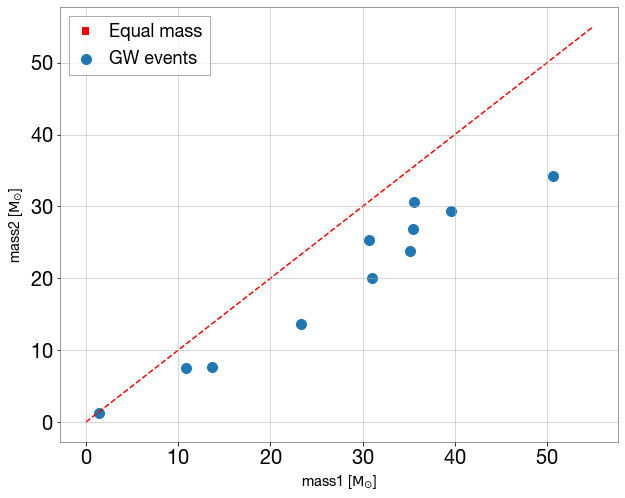

In [6]:
plot = events.scatter("mass1", "mass2", figsize=(10, 8), label="GW events", s=100)
ax = plot.gca()
ax.plot((0, 55), (0, 55), 'r--', label="Equal mass")
ax.legend()

## Mass vs distance

The table doesn't natively include the 'total mass' of the binary, but we can easily construct it before plotting it versus distance:

In [7]:
events.add_column(events["mass1"] + events["mass2"], name="mtotal")

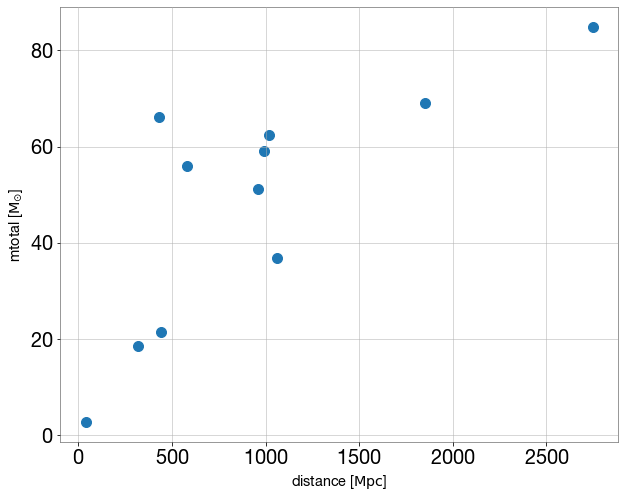

In [8]:
plot = events.scatter("distance", "mtotal", figsize=(10, 8), s=100)